# Important Library

We use the following libraries in this project:
* [Pandas](https://pandas.pydata.org/) - Data Analysis
* [Numpy](https://numpy.org/) - Data Analysis
* [Matplotlib](https://matplotlib.org/) - Data Visualization
* [Seaborn](https://seaborn.pydata.org/) - Data Visualization
* [Scikit-learn](https://scikit-learn.org/stable/) - Machine Learning
* [Tensorflow](https://www.tensorflow.org/) - Machine Learning
* [Keras](https://keras.io/) - Machine Learning

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

print(tf.__version__)
print(np.__version__)
print(sns.__version__)

2.12.0
1.23.5
0.12.2


# Exploring the Dataset

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory='./data/Vegetable Images/train',
    seed = 42,
    image_size=(224, 224),
    batch_size=64,
    shuffle=True,
)

test_data = tf.keras.utils.image_dataset_from_directory(
    directory='./data/Vegetable Images/test',
    seed = 42,
    image_size=(224, 224),
    batch_size=64,
    shuffle=False,
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    directory='./data/Vegetable Images/validation',
    seed = 42,
    image_size=(224, 224),
    batch_size=64,
    shuffle=True,
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


# Creating Small Model

In [3]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True,
    start_from_epoch=0
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-7,
    min_delta=0.0001,
    mode='auto'
)

In [4]:
# MobileNetV2 Pretrained Model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    classifier_activation='softmax'
)

In [5]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(15, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [7]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

# Training the Model

In [8]:
# tensorboard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

history = model.fit(train_data,
                    epochs=7, 
                    validation_data=validation_data,
                    verbose=1,
                    callbacks=[early_stopping, 
                               reduce_lr, 
                               tensorboard_callback
                              ]
                    )


Epoch 1/7
235/235 [==============================] - 2368s 10s/step - loss: 0.3072 - accuracy: 0.9242 - val_loss: 0.6026 - val_accuracy: 0.8070 - lr: 1.0000e-04
Epoch 2/7
235/235 [==============================] - 2274s 10s/step - loss: 0.0114 - accuracy: 0.9978 - val_loss: 0.1786 - val_accuracy: 0.9410 - lr: 1.0000e-04
Epoch 3/7
235/235 [==============================] - 2287s 10s/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0434 - val_accuracy: 0.9873 - lr: 1.0000e-04
Epoch 4/7
235/235 [==============================] - 2290s 10s/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0174 - val_accuracy: 0.9933 - lr: 1.0000e-04
Epoch 5/7
235/235 [==============================] - 2303s 10s/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0259 - val_accuracy: 0.9953 - lr: 1.0000e-04
Epoch 6/7
235/235 [==============================] - 2709s 12s/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0124 - val_accuracy: 0.9963 - lr: 1.0000e-04
Epoch 7/7
235/235 [===============

# Model Evaluation

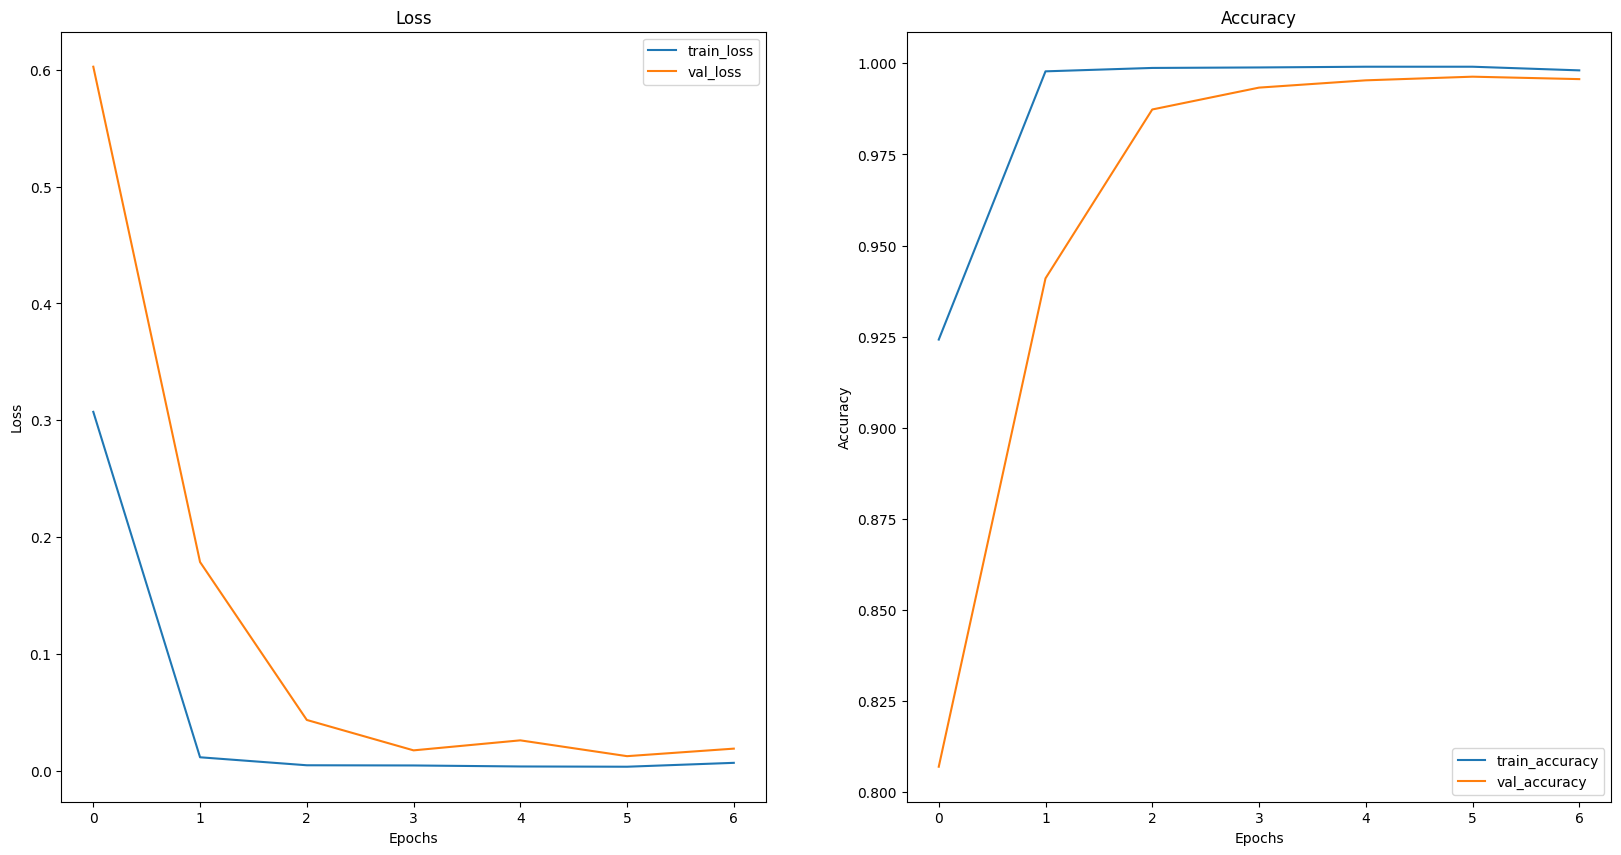

In [13]:
# Plotting the loss and accuracy curves
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# Evaluate the model and print results
loss, acc = model.evaluate(test_data)
print("Loss: ", loss)
print("Accuracy: ", acc)

47/47 [==============================] - 94s 2s/step - loss: 0.0128 - accuracy: 0.9953
Loss:  0.012829766608774662
Accuracy:  0.9953333139419556


47/47 [==============================] - 89s 2s/step
Accuracy:  0.9953333333333333


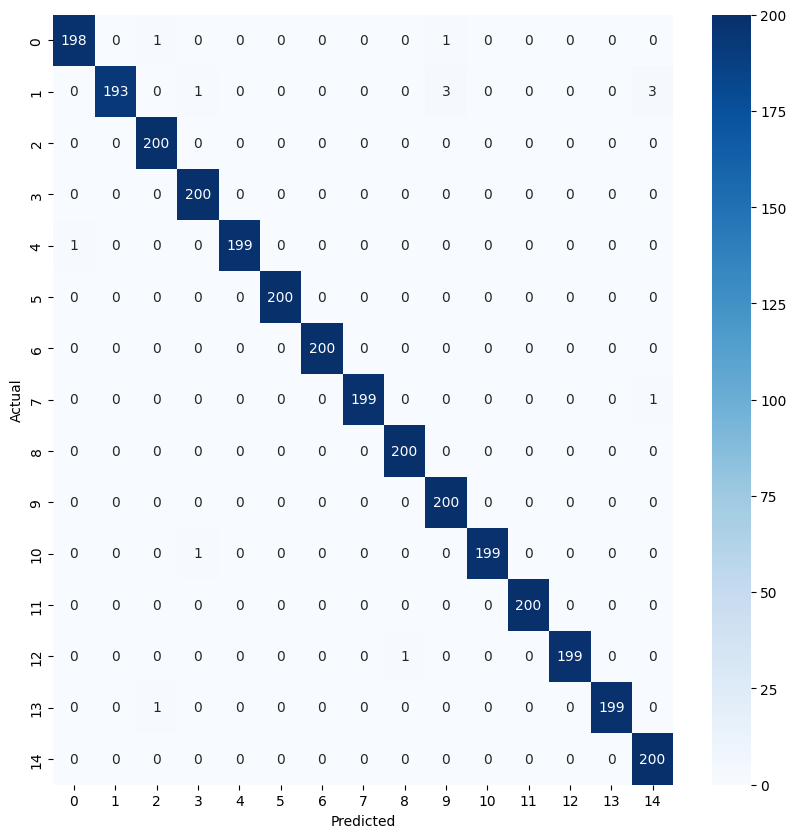

In [15]:
# Model predictions on test data, print results ( accuracy ) and plot confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_data], axis=0)

print("Accuracy: ", np.sum(y_pred == y_true) / len(y_true))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Save the model
model.save('vegetable_classification_model.h5')

# Converting the Model to TFLite

In [10]:
# Load the model
model = tf.keras.models.load_model('vegetable_classification_model.h5')

# Quantize and convert to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()

# Save the quantized model
with open('vegetable_classification_model_quantized.tflite', 'wb') as f:
    f.write(quantized_tflite_model)


INFO:tensorflow:Assets written to: C:\Users\brian\AppData\Local\Temp\tmpzt7maj4k\assets


INFO:tensorflow:Assets written to: C:\Users\brian\AppData\Local\Temp\tmpzt7maj4k\assets
